OLS test MSE: 7.59
Bayesian test MSE: 3.27


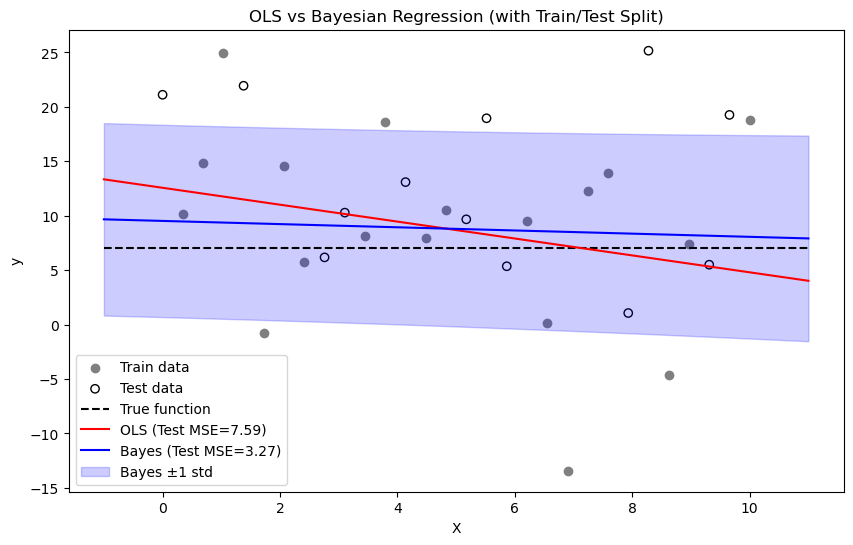

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

np.random.seed(0)

# 1. Generate data
n_samples = 30
X = np.linspace(0, 10, n_samples).reshape(-1, 1)
y_true = X.ravel() - X.ravel() + 7
noise = np.random.normal(0, 8, size=n_samples)
y_noisy = y_true + noise

# 2. Train/test split
X_train, X_test, y_train, y_test, y_true_train, y_true_test = train_test_split(
    X, y_noisy, y_true, test_size=0.4, random_state=42
)

# 3. Fit models
ols = LinearRegression().fit(X_train, y_train)
bayes = BayesianRidge().fit(X_train, y_train)

# 4. Predict and get metrics
y_pred_ols = ols.predict(X_test)
y_pred_bayes, y_std_bayes = bayes.predict(X_test, return_std=True)

mse_ols = mean_squared_error(y_true_test, y_pred_ols)
mse_bayes = mean_squared_error(y_true_test, y_pred_bayes)

print(f"OLS test MSE: {mse_ols:.2f}")
print(f"Bayesian test MSE: {mse_bayes:.2f}")

# 5. Plot results
xx = np.linspace(X.min() - 1, X.max() + 1, 200).reshape(-1, 1)
yy_true = xx.ravel()-xx.ravel() + 7
yy_ols = ols.predict(xx)
yy_bayes, yy_bayes_std = bayes.predict(xx, return_std=True)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='gray', label='Train data')
plt.scatter(X_test, y_test, facecolors='none', edgecolors='black', label='Test data')
plt.plot(xx, yy_true, 'k--', label='True function')
plt.plot(xx, yy_ols, 'r-', label=f'OLS (Test MSE={mse_ols:.2f})')
plt.plot(xx, yy_bayes, 'b-', label=f'Bayes (Test MSE={mse_bayes:.2f})')
plt.fill_between(xx.ravel(), yy_bayes - yy_bayes_std, yy_bayes + yy_bayes_std,
                 alpha=0.2, color='blue', label='Bayes ±1 std')
plt.legend()
plt.title("OLS vs Bayesian Regression (with Train/Test Split)")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

np.random.seed(0)

# Problem setup
n_samples = 80
p = 100
n_nonzero = 5

beta = np.zeros(p)
nonzero_idx = np.random.choice(p, n_nonzero, replace=False)
beta[nonzero_idx] = np.random.normal(0, 5, size=n_nonzero)

X = np.random.normal(size=(n_samples, p))
noise = np.random.normal(0, 2.0, size=n_samples)
y = X.dot(beta) + noise

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Fit models
ols = LinearRegression().fit(X_train, y_train)
bayes = BayesianRidge().fit(X_train, y_train)

# Predict
y_pred_ols = ols.predict(X_test)
y_pred_bayes = bayes.predict(X_test)

# Evaluate
mse_ols = mean_squared_error(y_test, y_pred_ols)
mse_bayes = mean_squared_error(y_test, y_pred_bayes)

print(f"True nonzero indices: {sorted(nonzero_idx.tolist())}")
print(f"OLS Test MSE: {mse_ols:.2f}")
print(f"Bayesian Test MSE: {mse_bayes:.2f}")
print(f"OLS Coef Norm: {np.linalg.norm(ols.coef_):.2f}")
print(f"Bayes Coef Norm: {np.linalg.norm(bayes.coef_):.2f}")


True nonzero indices: [2, 26, 55, 75, 86]
OLS Test MSE: 27.91
Bayesian Test MSE: 37.57
OLS Coef Norm: 5.92
Bayes Coef Norm: 3.79


In [3]:
import plotly.express as px

fig = px.scatter(px.data.iris(), x="sepal_width", y="sepal_length", color="species")
fig.write_html("iris_plot.html", include_plotlyjs="cdn")


In [4]:
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# -----------------------------
# Simulation function
# -----------------------------
def simulate(n_samples=80, beta_scale=5.0, random_state=0):
    np.random.seed(random_state)
    p = 100
    n_nonzero = 5

    # True beta
    beta = np.zeros(p)
    nonzero_idx = np.random.choice(p, n_nonzero, replace=False)
    beta[nonzero_idx] = np.random.normal(0, beta_scale, size=n_nonzero)

    # Data
    X = np.random.normal(size=(n_samples, p))
    noise = np.random.normal(0, 2.0, size=n_samples)
    y = X.dot(beta) + noise

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

    # Fit models
    ols = LinearRegression().fit(X_train, y_train)
    bayes = BayesianRidge().fit(X_train, y_train)

    # Predict
    y_pred_ols = ols.predict(X_test)
    y_pred_bayes = bayes.predict(X_test)

    # Evaluate
    mse_ols = mean_squared_error(y_test, y_pred_ols)
    mse_bayes = mean_squared_error(y_test, y_pred_bayes)

    return {
        "beta_true": beta,
        "beta_ols": ols.coef_,
        "beta_bayes": bayes.coef_,
        "mse_ols": mse_ols,
        "mse_bayes": mse_bayes,
        "nonzero_idx": nonzero_idx
    }

# -----------------------------
# Prepare parameter ranges
# -----------------------------
sample_sizes = [40, 80, 160, 320]
beta_scales = [1, 3, 5, 10]

# -----------------------------
# Generate all combinations
# -----------------------------
results = {}
for n in sample_sizes:
    for b in beta_scales:
        results[(n, b)] = simulate(n_samples=n, beta_scale=b)

# -----------------------------
# Build Plotly figure
# -----------------------------
fig = go.Figure()

# Add traces (hidden initially)
for n in sample_sizes:
    for b in beta_scales:
        res = results[(n, b)]
        fig.add_trace(go.Scatter(
            y=res["beta_true"],
            mode='lines+markers',
            name=f"True β (n={n}, β={b})",
            visible=False,
            line=dict(color='black', dash='dot')
        ))
        fig.add_trace(go.Scatter(
            y=res["beta_ols"],
            mode='lines+markers',
            name=f"OLS β (n={n}, β={b})",
            visible=False,
            line=dict(color='blue')
        ))
        fig.add_trace(go.Scatter(
            y=res["beta_bayes"],
            mode='lines+markers',
            name=f"Bayesian β (n={n}, β={b})",
            visible=False,
            line=dict(color='red')
        ))

# -----------------------------
# Create slider steps
# -----------------------------
steps = []
for i, n in enumerate(sample_sizes):
    for j, b in enumerate(beta_scales):
        step_idx = i * len(beta_scales) + j
        visible = [False] * len(fig.data)
        start = step_idx * 3
        for k in range(3):
            visible[start + k] = True

        mse_ols = results[(n, b)]["mse_ols"]
        mse_bayes = results[(n, b)]["mse_bayes"]

        step = dict(
            method="update",
            label=f"n={n}, β={b}",
            args=[
                {"visible": visible},
                {"title": f"True vs Estimated β — n={n}, β={b} "
                          f"<br>OLS MSE={mse_ols:.2f}, Bayes MSE={mse_bayes:.2f}"}
            ],
        )
        steps.append(step)

# -----------------------------
# Add sliders
# -----------------------------
sliders = [dict(
    active=0,
    currentvalue={"prefix": "Configuration: "},
    pad={"t": 50},
    steps=steps
)]

# Set initial visibility
for i in range(3):
    fig.data[i].visible = True

# -----------------------------
# Layout
# -----------------------------
fig.update_layout(
    sliders=sliders,
    title="True vs Estimated Coefficients (OLS vs Bayesian Ridge)",
    xaxis_title="Coefficient Index",
    yaxis_title="Coefficient Value",
    legend=dict(x=1.02, y=1, bgcolor="rgba(255,255,255,0.6)"),
    template="plotly_white"
)

# -----------------------------
# Save to HTML
# -----------------------------
fig.write_html("interactive_regression.html", include_plotlyjs='cdn')
fig.show()
